In [1]:
import pandas as pd

# Load the creator and brand datasets from CSV files
creator_data = pd.read_csv('creators_data.csv')
brand_data = pd.read_csv('brands_data.csv')

# Step 1: Check for Missing Values
creator_data.dropna(inplace=True)
brand_data.dropna(inplace=True)

# Step 2: Data Type Conversion (if needed)
# No specific data type conversion mentioned in the original datasets

# Step 3: Consistency in Column Names (if needed)
# No specific column name inconsistency mentioned in the original datasets

# Step 4: Handle Duplicate Data
creator_data.drop_duplicates(inplace=True)
brand_data.drop_duplicates(inplace=True)

# Step 5: Normalization and Scaling (if needed)
# No specific normalization or scaling mentioned in the original datasets

# Step 6: Handling Outliers (if needed)
# No specific outlier handling mentioned in the original datasets

# Step 7: Standardize Categorical Variables
creator_data['Content'] = creator_data['Content'].str.lower()
creator_data['Audience Gender'] = creator_data['Audience Gender'].str.lower()
brand_data['Target Audience Gender'] = brand_data['Target Audience Gender'].str.lower()

# Step 8: Remove Irrelevant Columns (if needed)
# No specific irrelevant columns mentioned in the original datasets

# Step 9: Address Data Quality Issues (if needed)
# No specific data quality issues mentioned in the original datasets

# Step 10: Merging Datasets (if needed)
# No specific merging required based on the original datasets

# Save the cleaned datasets to new CSV files
creator_data.to_csv('cleaned_creator_dataset.csv', index=False)
brand_data.to_csv('cleaned_brand_dataset.csv', index=False)

print("Data cleaning and preprocessing completed.")


Data cleaning and preprocessing completed.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Creator ID         22 non-null     int64 
 1   Creator Name       22 non-null     object
 2   Username           22 non-null     object
 3   Content            22 non-null     object
 4   Followers          22 non-null     int64 
 5   Likes              22 non-null     int64 
 6   Comments           22 non-null     int64 
 7   Shares             22 non-null     int64 
 8   Views              22 non-null     int64 
 9   Audience Age       22 non-null     object
 10  Audience Gender    22 non-null     object
 11  Audience Location  22 non-null     object
 12  Video URL          22 non-null     object
dtypes: int64(6), object(7)
memory usage: 2.4+ KB
None
   Creator ID      Creator Name         Username  \
0           1  Charlie D'Amelio  @charliedamelio   
1           2       Addison Rae  

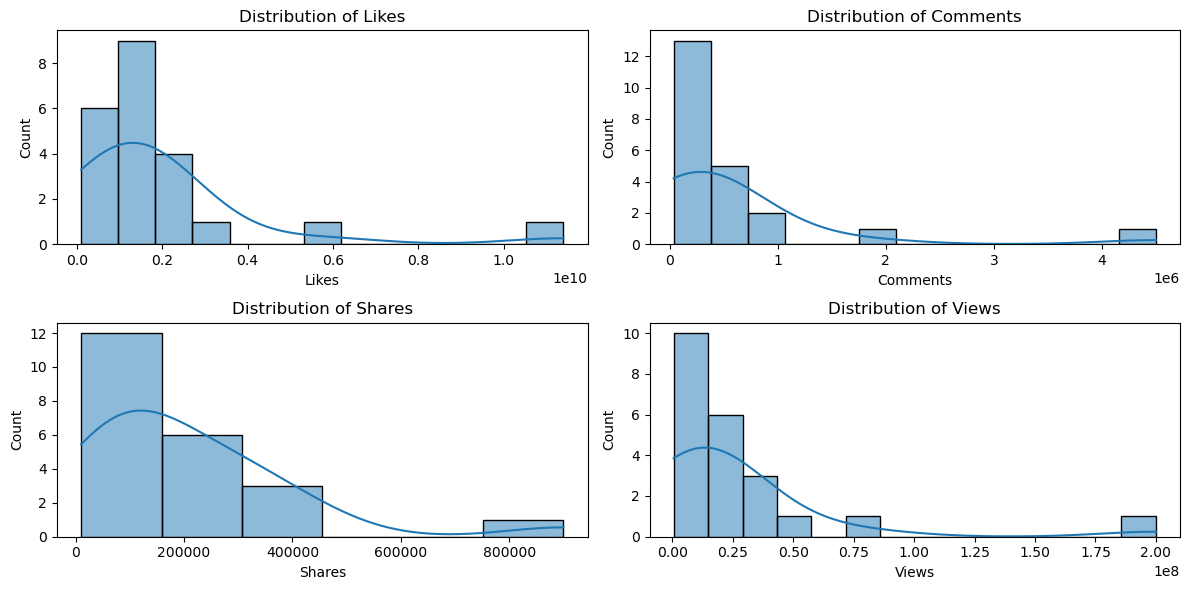

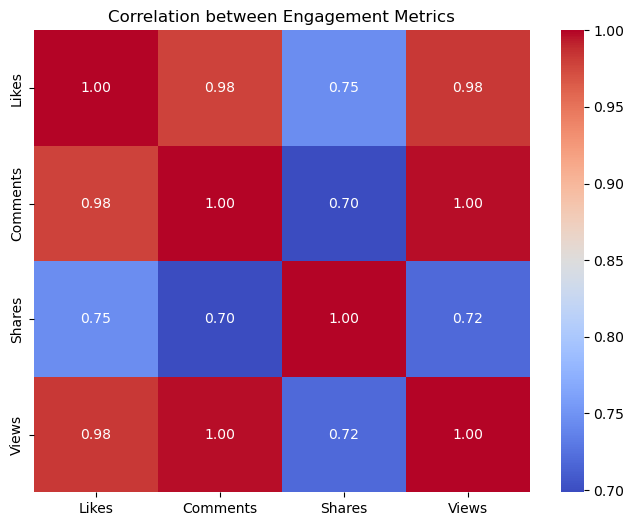

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the creator dataset
creator_data = pd.read_csv('cleaned_creator_dataset.csv')

# Print basic information about the dataset
print(creator_data.info())

# Display the first few rows of the dataset to get an overview
print(creator_data.head())

# Summary statistics of engagement metrics
print(creator_data[['Likes', 'Comments', 'Shares', 'Views']].describe())

# Visualize engagement metrics
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(creator_data['Likes'], kde=True)
plt.title('Distribution of Likes')

plt.subplot(2, 2, 2)
sns.histplot(creator_data['Comments'], kde=True)
plt.title('Distribution of Comments')

plt.subplot(2, 2, 3)
sns.histplot(creator_data['Shares'], kde=True)
plt.title('Distribution of Shares')

plt.subplot(2, 2, 4)
sns.histplot(creator_data['Views'], kde=True)
plt.title('Distribution of Views')

plt.tight_layout()
plt.show()

# Correlation between engagement metrics
engagement_corr = creator_data[['Likes', 'Comments', 'Shares', 'Views']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(engagement_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Engagement Metrics')
plt.show()


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

# Download required NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the creator dataset
creator_data = pd.read_csv('cleaned_creator_dataset.csv')

# Data Preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])
    # Tokenize the text into individual words or tokens
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply data preprocessing to the "Content" column
creator_data['Processed_Content'] = creator_data['Content'].apply(preprocess_text)

# Predefined categories
categories = ['dance videos', 'comedy sketches', 'makeup tutorials', 'lifestyle', 'lip syncing',
              'beatboxing', 'vlogs', 'parodies', 'magic tricks', 'video editing', 'music',
              'reaction videos', 'beauty content', 'beauty content']

# Text Classification
def classify_content(text):
    similarity_scores = cosine_similarity(
        tfidf_vectorizer.transform([text]),
        tfidf_vectorizer.transform(categories)
    )
    return categories[similarity_scores.argmax()]

# Text Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed content to create TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(creator_data['Processed_Content'])

# Apply text classification to the processed content
creator_data['Category'] = creator_data['Processed_Content'].apply(classify_content)

# Store Results
# Save the results in a new DataFrame or use it directly for the recommendation system
recommendation_data = creator_data[['Creator ID', 'Creator Name', 'Category']]

# Display the recommendation data
print(recommendation_data)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anishgaikwad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anishgaikwad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anishgaikwad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


    Creator ID      Creator Name         Category
0            1  Charlie D'Amelio     dance videos
1            2       Addison Rae        lifestyle
2            3      Bella Poarch      lip syncing
3            4         Spencer X       beatboxing
4            5        Michael Le  comedy sketches
5            6    Dixie D'Amelio            vlogs
6            7        Tony Lopez  comedy sketches
7            8            Larray  comedy sketches
8            9         Zach King    video editing
9           10      Jason Derulo            music
10          11        Khaby Lame  reaction videos
11          12     James Charles   beauty content
12          13         Noah Beck        lifestyle
13          14         Joja Siwa            music
14          15        Loren Gray        lifestyle
15          16      David Dobrik            vlogs
16          17   Nikkie de Jager   beauty content
17          18      Brent Rivera            vlogs
18          19         Lele Pons            vlogs


In [ ]:
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load the creator dataset
creator_data = pd.read_csv('cleaned_creator_dataset.csv')

# Function to perform image analysis using ResNet50
def analyze_image(img_array):
    # Load the ResNet50 model (pre-trained on ImageNet)
    model = ResNet50(weights='imagenet')
    # Preprocess the image
    img_array = preprocess_input(img_array)
    # Expand the dimensions to match the input shape of ResNet50 (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)
    # Predict the content of the image
    predictions = model.predict(img_array)
    # Decode the predictions to get human-readable labels
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    # Extract the top 3 predicted labels and their probabilities
    top_predictions = [(label, prob) for (_, label, prob) in decoded_predictions]
    return top_predictions

# Function to analyze visual content from video URLs
def analyze_visual_content(url_list):
    visual_features = []
    for url in url_list:
        # Extract the image URL from the video URL
        image_url = url.split('@')[-1]
        # Download the image
        response = requests.get(image_url)
        img_data = np.frombuffer(response.content, np.uint8)
        img = cv2.imdecode(img_data, cv2.IMREAD_COLOR)
        # Process the image and get visual features
        visual_feature = analyze_image(img)
        visual_features.append(visual_feature)
    return visual_features

# Data Preprocessing and Image Analysis
results = []
for index, row in creator_data.iterrows():
    if 'image' in row['Content'].lower() or 'video' in row['Content'].lower():
        # Extract image or video URLs
        video_urls = row['Video URL'].split(', ')
        # Analyze the visual content
        visual_features = analyze_visual_content(video_urls)
        # Perform analysis on visual features (e.g., identify common objects, scenes, etc.)
        # Implement your analysis logic here

        # Append the results to the list
        results.append({
            'Creator ID': row['Creator ID'],
            'Creator Name': row['Creator Name'],
            'Visual Features': visual_features
        })

# Store the results in a DataFrame
results_df = pd.DataFrame(results)

# Display the image analysis results
print(results_df)


In [1]:
import os
import pandas as pd

# Path to the folder where you have the videos
folder_path = '/Users/anishgaikwad/Desktop/Tiktok/Tiktok Videos'

# Get a list of all the mp4 files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.mp4')]

# Sort the files alphabetically
all_files.sort()

# Create a dictionary where the key is the base creator name and the value is a list of file paths
files_dict = {}
for file in all_files:
    # Extract base creator name by removing numbers and '.mp4' from the file name
    base_name = ''.join([i for i in file[:-4] if not i.isdigit()])
    
    # Add the full path of the file to the dictionary
    if base_name not in files_dict:
        files_dict[base_name] = []
    files_dict[base_name].append(os.path.join(folder_path, file))

# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(files_dict.items()), columns=['Creator', 'Videos'])

# Save the DataFrame to a CSV file
df.to_csv('video_paths.csv', index=False)


In [3]:
import pandas as pd
import ast

# Load the csv file
df = pd.read_csv('video_paths.csv')

# Function to update the paths
def update_paths(paths):
    # Convert the string representation of the list back to a list
    paths_list = ast.literal_eval(paths)
    updated_paths = [path.replace('/Users/anishgaikwad/Desktop/Tiktok', '/content/drive/MyDrive/Tiktok_Project') for path in paths_list]
    return updated_paths

# Update the 'Video URL' column
df['Videos'] = df['Videos'].apply(update_paths)

# Save to a new csv file
df.to_csv('updated_video_paths.csv', index=False)


In [4]:
import pandas as pd

# Load the content similarity scores and the visual features
content_similarity_scores = pd.read_csv('/Users/anishgaikwad/Desktop/Tiktok/content_similarity_scores.csv')
visual_features = pd.read_csv('/Users/anishgaikwad/Desktop/Tiktok/Tiktok_Data_With_Features.csv')

# Merge the two dataframes on the creator's identifier (assuming it's "Username" in both dataframes)
merged_results = pd.merge(content_similarity_scores, visual_features, on='Creator Name', how='inner')

# Save the merged results to a CSV file
merged_results.to_csv('/Users/anishgaikwad/Desktop/Tiktok/merged_results.csv', index=False)


In [5]:
# Load the merged results
merged_results = pd.read_csv('/Users/anishgaikwad/Desktop/Tiktok/merged_results.csv')

# Check the dimensions of the merged dataframe
print('Dimensions of merged results:', merged_results.shape)

# Inspect the columns of the merged dataframe
print('Columns in merged results:', merged_results.columns)

# Inspect a few rows of the merged dataframe
print(merged_results.head())

# Check for missing values
print('Missing values in merged results:', merged_results.isnull().sum())

# Check the datatype of each column
print('Data types of merged results:', merged_results.dtypes)


Dimensions of merged results: (22, 27)
Columns in merged results: Index(['Creator Name', 'dance videos', 'comedy sketches', 'makeup tutorials',
       'lifestyle', 'lip syncing', 'beatboxing', 'vlogs', 'parodies',
       'magic tricks', 'video editing', 'music', 'reaction videos',
       'beauty content', 'Creator ID', 'Username', 'Content', 'Followers',
       'Likes', 'Comments', 'Shares', 'Views', 'Audience Age',
       'Audience Gender', 'Audience Location', 'Video URL', 'Visual_Features'],
      dtype='object')
       Creator Name  dance videos  comedy sketches  makeup tutorials  \
0  Charlie D'Amelio      1.000000         0.506905          0.523445   
1       Addison Rae      0.940150         0.488856          0.568436   
2      Bella Poarch      0.754901         0.372542          0.535102   
3         Spencer X      0.303327         0.228244          0.163283   
4        Michael Le      0.900543         0.831260          0.497386   

   lifestyle  lip syncing  beatboxing     vlo

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

# Load the creators' data and brands' data into Pandas dataframes
merged_results = pd.read_csv("/Users/anishgaikwad/Desktop/Tiktok/merged_results.csv")
brands_df = pd.read_csv("/Users/anishgaikwad/Desktop/Tiktok/cleaned_brand_dataset.csv")

# Data Preparation:

# Handle missing values
merged_results = merged_results.dropna()
brands_df = brands_df.dropna()

# Remove unnecessary columns
columns_to_remove = []  # Update this list with the columns to be removed
merged_results = merged_results.drop(columns=columns_to_remove)
brands_df = brands_df.drop(columns=columns_to_remove)

# One-hot encode categorical variables for both dataframes together
combined_df = pd.concat([merged_results, brands_df], axis=0, ignore_index=True)
categorical_columns = ['Target Audience Age', 'Target Audience Gender', 'Target Audience Location', 'Marketing Goals', 'Previous Sponsorship Activities', 'Audience Age', 'Audience Gender', 'Audience Location']
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
combined_df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(combined_df[categorical_columns]), columns=one_hot_encoder.get_feature_names_out(categorical_columns))
combined_df = pd.concat([combined_df, combined_df_encoded], axis=1).drop(columns=categorical_columns)

# Split the combined dataframe back into 'merged_results' and 'brands_df'
merged_results = combined_df.iloc[:len(merged_results), :]
brands_df = combined_df.iloc[len(merged_results):, :]

# Feature Engineering:

# Scale or normalize numerical features
numerical_columns = ['Followers', 'Likes', 'Comments', 'Shares', 'Views']  # Adjust based on your data
scaler = StandardScaler()
merged_results[numerical_columns] = scaler.fit_transform(merged_results[numerical_columns])
brands_df[numerical_columns] = scaler.transform(brands_df[numerical_columns])  # Use the same scaler for both dataframes

# Ensure both dataframes have the same set of columns
common_columns = np.intersect1d(merged_results.columns, brands_df.columns)
merged_results = merged_results[common_columns]
brands_df = brands_df[common_columns]


/var/folders/y5/3p0nbtv14r56m996r73mrbxc0000gn/T/ipykernel_41384/1579373033.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_results[numerical_columns] = scaler.fit_transform(merged_results[numerical_columns])
/var/folders/y5/3p0nbtv14r56m996r73mrbxc0000gn/T/ipykernel_41384/1579373033.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brands_df[numerical_columns] = scaler.transform(brands_df[numerical_columns])  # Use the same scaler for both dataframes


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(merged_results, brands_df):
    # Calculate the cosine similarity between creators and brands
    similarity_matrix = cosine_similarity(merged_results, brands_df)
    
    return similarity_matrix


In [27]:
# Check for NaN values in creators and brands dataframes
print("NaN values in creators:", merged_results.isnull().sum().sum())
print("NaN values in brands:", brands_df.isnull().sum().sum())

# Replace NaN values with 0
merged_results.fillna(0, inplace=True)
brands_df.fillna(0, inplace=True)

# Check for infinite values in numeric columns of creators and brands dataframes
print("Infinite values in creators:", merged_results[common_numeric_columns].applymap(np.isinf).sum().sum())
print("Infinite values in brands:", brands_df[common_numeric_columns].applymap(np.isinf).sum().sum())

# Replace infinite values with 0 in numeric columns
merged_results[common_numeric_columns] = merged_results[common_numeric_columns].replace([np.inf, -np.inf], 0)
brands_df[common_numeric_columns] = brands_df[common_numeric_columns].replace([np.inf, -np.inf], 0)

# Extract numeric features for creators and brands
creator_features = merged_results[common_numeric_columns].to_numpy()
brand_features = brands_df[common_numeric_columns].to_numpy()


# Calculate the cosine similarity between creators and brands
similarity_matrix = cosine_similarity(creator_features, brand_features)

NaN values in creators: 0
NaN values in brands: 0
Infinite values in creators: 0
Infinite values in brands: 0


In [28]:
# Create a Pandas dataframe to store the similarity scores
similarity_scores_df = pd.DataFrame(similarity_matrix, index=merged_results.index, columns=brands_df.index)

print(similarity_scores_df.head())


    22   23   24   25   26   27   28   29   30   31  ...   61   62   63   64  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    65   66   67   68   69   70  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 49 columns]


In [29]:
# Inspect the data
print(merged_results.head())
print(brands_df.head())
print(merged_results.describe())
print(brands_df.describe())

# Check for zero vectors
zero_rows_merged_results = merged_results[merged_results == 0].all(axis=1)
zero_rows_brands_df = brands_df[brands_df == 0].all(axis=1)
print("Rows with all zeros in merged_results:", zero_rows_merged_results.sum())
print("Rows with all zeros in brands_df:", zero_rows_brands_df.sum())


   Audience Age_13-24  Audience Age_18-24  Audience Age_18-34  \
0                 1.0                 0.0                 0.0   
1                 1.0                 0.0                 0.0   
2                 1.0                 0.0                 0.0   
3                 1.0                 0.0                 0.0   
4                 1.0                 0.0                 0.0   

   Audience Age_nan  Audience Gender_male  Audience Gender_male, female  \
0               0.0                   0.0                           0.0   
1               0.0                   0.0                           0.0   
2               0.0                   0.0                           1.0   
3               0.0                   1.0                           0.0   
4               0.0                   0.0                           1.0   

   Audience Gender_nan  Audience Location_nan  Brand ID  Brand Name  ...  \
0                  0.0                    0.0         0           0  ...   
1     

Rows with all zeros in merged_results: 0
Rows with all zeros in brands_df: 0


In [31]:
print(merged_results.dtypes)


Audience Age_13-24      float64
Audience Age_18-24      float64
Audience Age_18-34      float64
Audience Age_nan        float64
Audience Gender_male    float64
                         ...   
music                   float64
parodies                float64
reaction videos         float64
video editing           float64
vlogs                   float64
Length: 140, dtype: object


In [43]:
import numpy as np

# Check for NaN or infinity values
print("NaN values in scaled_merged_results:", np.isnan(scaled_merged_results).any())
print("Infinity values in scaled_merged_results:", np.isinf(scaled_merged_results).any())

print("NaN values in scaled_brands_df:", np.isnan(scaled_brands_df).any())
print("Infinity values in scaled_brands_df:", np.isinf(scaled_brands_df).any())

# Replace NaN values with 0 (or use an imputer)
scaled_merged_results = np.nan_to_num(scaled_merged_results)
scaled_brands_df = np.nan_to_num(scaled_brands_df)

# Recompute similarity scores
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(scaled_merged_results, scaled_brands_df)
similarity_scores_df = pd.DataFrame(similarity_matrix, index=merged_results.index, columns=brands_df.index)
similarity_scores_df.to_csv('similarity_scores.csv')
print(similarity_scores_df.head())


NaN values in scaled_merged_results: False
Infinity values in scaled_merged_results: False
NaN values in scaled_brands_df: False
Infinity values in scaled_brands_df: False
         22        23        24        25        26        27        28  \
0 -0.055777 -0.055591 -0.055591 -0.055591 -0.055591 -0.055591 -0.055591   
1 -0.100201 -0.099866 -0.099866 -0.099866 -0.099866 -0.099866 -0.099866   
2  0.059201  0.059003  0.059003  0.059003  0.059003  0.059003  0.059003   
3  0.422550  0.421140  0.421140  0.421140  0.421140  0.421140  0.421140   
4 -0.110440 -0.110072 -0.110072 -0.110072 -0.110072 -0.110072 -0.110072   

         29        30        31  ...        61        62        63        64  \
0 -0.055965 -0.055591 -0.055591  ... -0.055591 -0.055407 -0.055777 -0.055777   
1 -0.100539 -0.099866 -0.099866  ... -0.099866 -0.099535 -0.100201 -0.100201   
2  0.059401  0.059003  0.059003  ...  0.059003  0.058808  0.059201  0.059201   
3  0.423975  0.421140  0.421140  ...  0.421140  0.419744 

In [38]:
instance_index = 0 # The index of the instance you're interested in
sorted_recommendations = similarity_scores_df.iloc[instance_index].sort_values(ascending=False)
print(sorted_recommendations)

67   -0.055407
62   -0.055407
58   -0.055407
52   -0.055407
70   -0.055591
50   -0.055591
44   -0.055591
45   -0.055591
23   -0.055591
47   -0.055591
48   -0.055591
54   -0.055591
51   -0.055591
42   -0.055591
55   -0.055591
61   -0.055591
65   -0.055591
68   -0.055591
43   -0.055591
46   -0.055591
41   -0.055591
34   -0.055591
27   -0.055591
40   -0.055591
30   -0.055591
31   -0.055591
32   -0.055591
33   -0.055591
26   -0.055591
25   -0.055591
37   -0.055591
24   -0.055591
28   -0.055591
60   -0.055777
66   -0.055777
64   -0.055777
63   -0.055777
69   -0.055777
56   -0.055777
59   -0.055777
57   -0.055777
53   -0.055777
49   -0.055777
35   -0.055777
36   -0.055777
38   -0.055777
39   -0.055777
22   -0.055777
29   -0.055965
Name: 0, dtype: float64


In [49]:
print(brands_df.index)
print(brands_df.head())


RangeIndex(start=0, stop=49, step=1)
  Brand ID  Brand Name Target Audience Age Target Audience Gender  \
0     B001        Nike               13-35                    all   
1     B002   Coca-Cola                 All                    all   
2     B003  McDonald's                 All                    all   
3     B004       Apple               18-45                    all   
4     B005      Amazon               18-45                    all   

  Target Audience Location                                    Marketing Goals  \
0                Worldwide  Showcase Nike's athletic apparel, shoes, and i...   
1                Worldwide  Highlight Coca-Cola's refreshing beverages and...   
2                Worldwide  Showcase McDonald's delicious food offerings a...   
3                Worldwide  Promote Apple's latest products and technology...   
4                Worldwide  Highlight Amazon's wide range of products and ...   

                     Previous Sponsorship Activities  
0  Par

In [52]:
import pandas as pd

# Load the data
creators_df = pd.read_csv('cleaned_creator_dataset.csv')
brands_df = pd.read_csv('cleaned_brand_dataset.csv')

# Reset the index of the brands_df DataFrame
brands_df.reset_index(drop=True, inplace=True)

# Generate the recommendations again
creator_recommendations = []

# Loop through each creator and their similarity scores
for creator_index, creator_similarity_scores in similarity_scores_df.iterrows():

    # Get the indices of the top brands for the current creator
    top_brand_indices = np.argsort(creator_similarity_scores)[-5:][::-1]

    # Store the top brands and their scores
    top_brands = []
    top_scores = []

    # Get the brand names and scores from the brands_df DataFrame
    for brand_index in top_brand_indices:
        brand_name = brands_df.loc[brand_index, 'Brand Name']
        score = creator_similarity_scores.iloc[brand_index]
        top_brands.append(brand_name)
        top_scores.append(score)

    # Store the recommendations for the current creator
    creator_recommendations.append({
        'Creator Name': creators_df.loc[creator_index, 'Creator Name'],
        'Top Brands': top_brands,
        'Similarity Scores': top_scores
    })

# Convert the recommendations into a DataFrame
recommendations_df = pd.DataFrame(creator_recommendations)

# Save the recommendations to a CSV file
recommendations_df.to_csv('recommendations.csv', index=False)
